<a href="https://colab.research.google.com/github/abosedealli/Stockprediction/blob/main/ARIMA%20short%20time.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima
import pmdarima as pm
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random
!pip inatall pandas 
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 26.5 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "inatall" - maybe you meant "install"


In [6]:
x = pd.read_csv("/content/neflix.csv")

In [7]:
x['Date'] = pd.to_datetime(x['Date'])
x.set_index('Date',inplace=True)
x = x[['High','Low','Open','Close', 'Adj Close','Volume']]
x.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 756 entries, 2020-02-01 to 2022-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       756 non-null    float64
 1   Low        756 non-null    float64
 2   Open       756 non-null    float64
 3   Close      756 non-null    float64
 4   Adj Close  756 non-null    float64
 5   Volume     756 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 41.3 KB


In [8]:
data = x.iloc[:int(0.8*len(x))]
print(data.shape)
testdata = x.iloc[int(0.8*len(x)):]
print(testdata.shape)

(604, 6)
(152, 6)


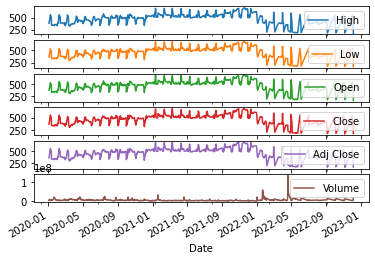

In [9]:
import matplotlib.pyplot as plt

data.plot(subplots=True)
plt.show()

In [10]:
model = pm.auto_arima(data
                      ['Adj Close'], 
                        m=4, seasonal=True,
                      start_p=1, start_q=1, max_order=2, test='adf',error_action='ignore',  
                           suppress_warnings=True,
                      stepwise=True, trace=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[4] intercept   : AIC=4871.890, Time=3.72 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=4867.569, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=4868.515, Time=0.26 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=4868.572, Time=0.32 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=4865.768, Time=0.03 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=4868.529, Time=0.18 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=4868.532, Time=0.18 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=4869.987, Time=0.57 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=4867.430, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=4867.477, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=4869.377, Time=0.65 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 6.405 seconds


In [14]:
model.fit(data['Adj Close'])

ARIMA(order=(0, 1, 0), scoring_args={}, seasonal_order=(0, 0, 0, 4),
      suppress_warnings=True, with_intercept=False)

In [15]:
model.fit(data['Adj Close'])
forecast=model.predict(n_periods=len(testdata), return_conf_int=True)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


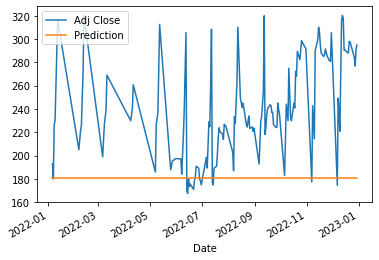

In [16]:
forecast_df = pd.DataFrame()
forecast_df['Prediction'] = forecast[0]
forecast_df.set_index(testdata.index,inplace=True)

short_model = pd.concat([testdata['Adj Close'],forecast_df],axis=1)
short_model.replace([np.inf, -np.inf], np.nan, inplace=True)
short_model.dropna(inplace=True)
short_model.plot()

In [17]:
short_model

,Adj Close,Prediction
Date,,
2022-05-25,187.830002,180.339996
2022-05-26,191.399994,180.339996
2022-05-27,195.190002,180.339996
2022-05-31,197.440002,180.339996
2022-01-06,192.910004,180.339996
...,...,...
2022-12-23,294.959991,180.339996
2022-12-27,284.170013,180.339996
2022-12-28,276.880005,180.339996


In [26]:
from sklearn.metrics import mean_squared_error
#from sklearn.metrics import root_mean_squared_error as rmse
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(forecast_df['Prediction'] - testdata['Adj Close']))

# Calculate RMSE and MAPE
rmse = np.sqrt(np.mean((forecast_df['Prediction']  - testdata['Adj Close'])**2))
mape = np.mean(np.abs(forecast_df['Prediction']  - testdata['Adj Close']) / testdata['Adj Close'])
mse=(np.mean((forecast_df['Prediction'] - testdata['Adj Close'])**2))


print("RMSE:", rmse)
print("MAPE:", mape)
print("MSE", mse)
print("MAE:", mae)

RMSE: 73.5293923583162
MAPE: 0.23131341979352785
MSE 5406.571540583209
MAE: 61.02145130921051
